# SSAP : Seismographic Signal Analyser and Predictor

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import math
import random

## Generation of a Standard Earthquake Signal

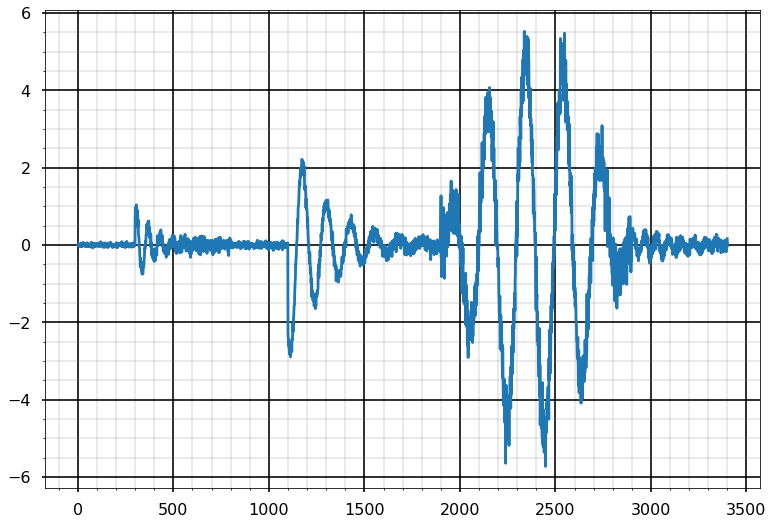

In [2]:
def rand():
    return(random.randint(0,10))

noise1 = list(np.random.normal(0, 0.03, 300))
mt = []
eq_wave = []

for i in range(300):
    eq_wave.append(noise1[i])

noise2 = np.random.normal(0, 0.1, 800)
noise3 = np.random.normal(0, 0.05, 800)
noise4 = np.random.normal(0, 0.1,800)
noise5 = np.random.normal(0, 0.4,1000)

rnd1 = rand()
rnd2 = rand()

for i in range(0,500):
    eq_wave.append(math.exp(-i/100)*math.sin(10*i/100 + rnd1) + noise2[i])

for i in range(0,300):
    eq_wave.append(noise3[i])

for i in range(0,800):
    eq_wave.append(3*math.exp(-0.5*i/100)*math.sin(5*i/100 + rnd2) + noise4[i])
    

A = random.randint(4,8)
B = 1

for i in range(1000):
    c = A*math.sin(2*3.14*10*i)
    m = B*math.sin(2*3.14*1*i)
    eq_wave.append(c*m + noise5[i])

for i in range(0,500):
    eq_wave.append(0.3*math.exp(-0.3*i/100)*math.sin(10*i/100 + rnd1) + noise4[i])

plt.style.use('seaborn-poster')
plt.plot(eq_wave)
plt.grid(which='major',linestyle='-',color='black')
plt.minorticks_on()
plt.grid(which='minor',linestyle='-',color='gray',alpha=0.2)

## Algorithm to find the Epicenter of the Earthquake

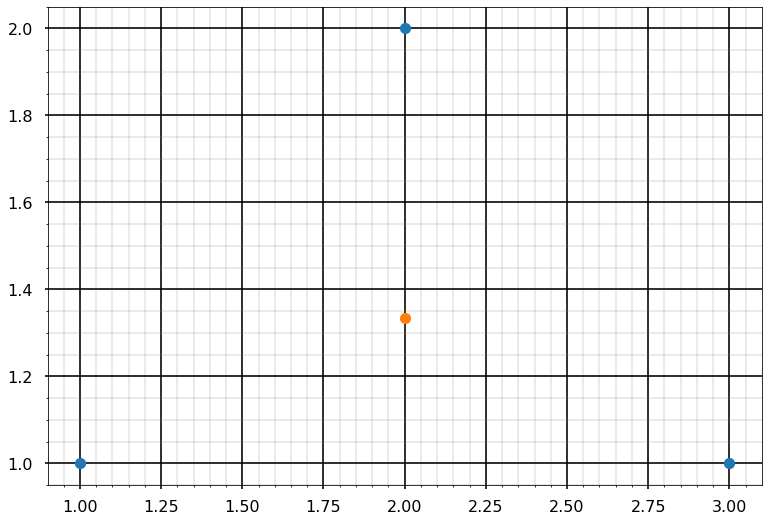

In [3]:
x = [1,2,3]
y = [1,2,1]
m = [1,1,1]

numerator_x = 0
numerator_y = 0
denominator = 0

for i in range(len(x)):
    numerator_x += m[i]*x[i]
    numerator_y += m[i]*y[i]
    denominator += m[i]
    
x_cm = numerator_x/denominator
y_cm = numerator_y/denominator

plt.style.use('seaborn-poster')
plt.plot(x,y,'o')
plt.plot(x_cm,y_cm,'o')
plt.grid(which='major',linestyle='-',color='black')
plt.minorticks_on()
plt.grid(which='minor',linestyle='-',color='gray',alpha=0.2)

## Reading Earthquake Data 

Asymmetric Data
69.662 23.245
MMI at Epicenter: 11


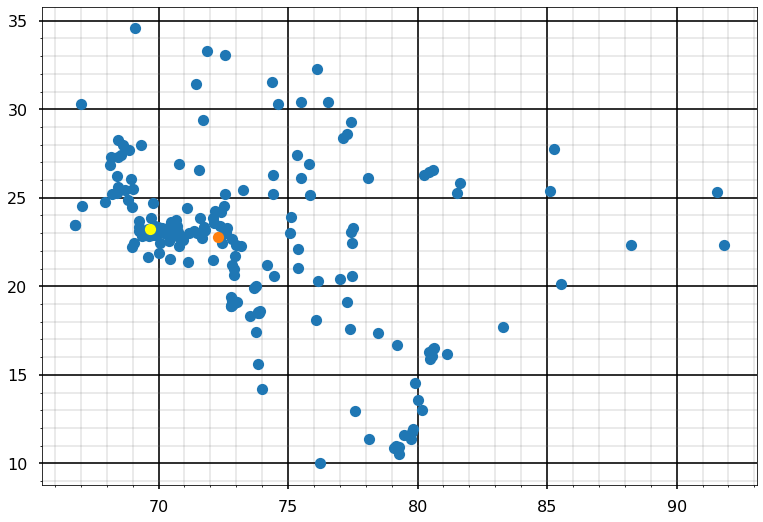

In [18]:
file_location = r'DSP.xlsx'
df = pd.read_excel(file_location)

x = df['longitude']
y = df['latitude']
m = df['MMI']

epicenter = max(m)

for i in range(len(m)):
    if m[i]==epicenter:
        longitude_epi = x[i]
        latitude_epi = y[i]
        x_max = x[i]
        y_max = y[i]
        break


numerator_x = 0
numerator_y = 0
denominator = 0

for i in range(len(x)):
    numerator_x += m[i]*x[i]
    numerator_y += m[i]*y[i]
    denominator += m[i]
    
x_cm = numerator_x/denominator
y_cm = numerator_y/denominator

if((abs(x_cm-x_max)>0.5)or(abs(y_cm-y_max)>0.5)):
    print("Asymmetric Data")
    print(x_max,y_max)
    #print(x_cm,y_cm)
print("MMI at Epicenter:",epicenter)
    
plt.style.use('seaborn-poster')
plt.plot(x,y,'o')
plt.plot(x_cm,y_cm,'o')
plt.plot(x_max,y_max,'o',color='yellow')
plt.grid(which='major',linestyle='-',color='black')
plt.minorticks_on()
plt.grid(which='minor',linestyle='-',color='gray',alpha=0.2)

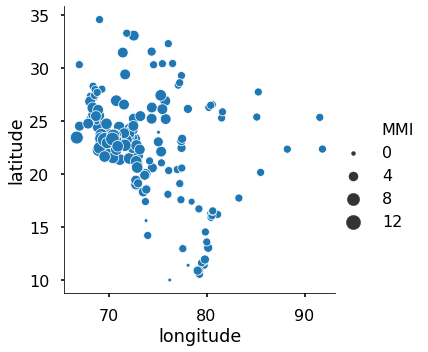

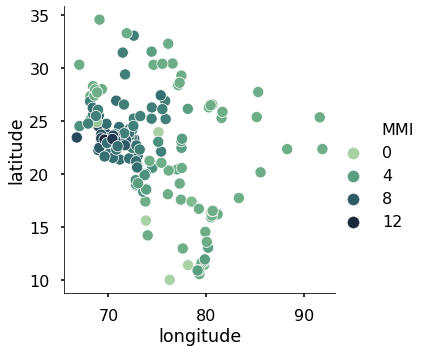

In [5]:
from mpl_toolkits import mplot3d
sns.relplot(x="longitude", y="latitude", size="MMI", sizes=(15, 200), data=df)
sns.relplot(x="longitude", y="latitude", hue="MMI", palette="ch:r=-.5,l=.75", data=df)

## Curve Fitting of the Earthquake Data
### Simulating Symmetrical Wave Dissipation

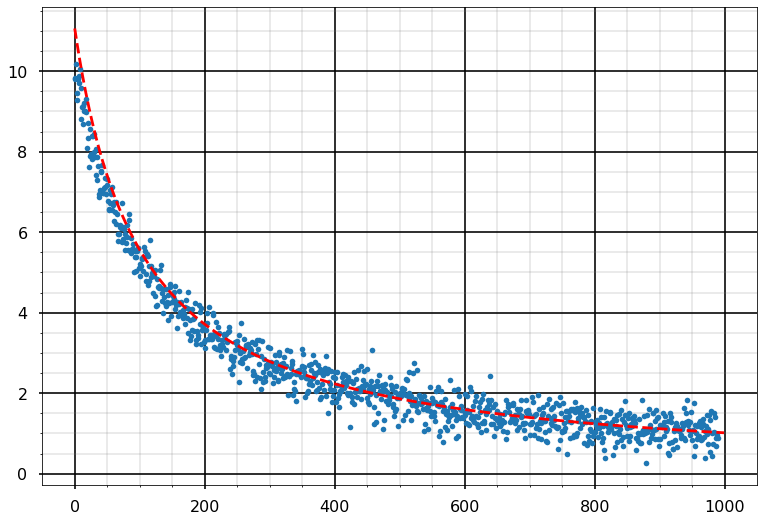

MMI at Epicenter for Regenerated Wave: 11.060468020322297


In [6]:
from scipy.optimize import curve_fit 

values = []   #generating the samples
rng = []      #the range of signal
ans = []      #reconstructed signal
rnd = np.random.normal(0, 0.3, 1000)
for i in range(10,1000):
    values.append(101*epicenter/(i + 100) + rnd[i])
    rng.append(i)
plt.plot(values,'.')

def test(x, a, b): 
    return a/(x+b)
  
param, param_cov = curve_fit(test, rng, values)

for i in range(0,1000):
    ans.append(param[0]/(i + param[1]))

plt.style.use('seaborn-poster')
plt.plot(ans, '--', color ='red', label ="optimized data")
plt.grid(which='major',linestyle='-',color='black')
plt.minorticks_on()
plt.grid(which='minor',linestyle='-',color='gray',alpha=0.2)
plt.show()

print("MMI at Epicenter for Regenerated Wave:",ans[0])

## Earthquake Wave Matching

Correlation:  0.8656341461702383
Match Successful

Input Wave Plot


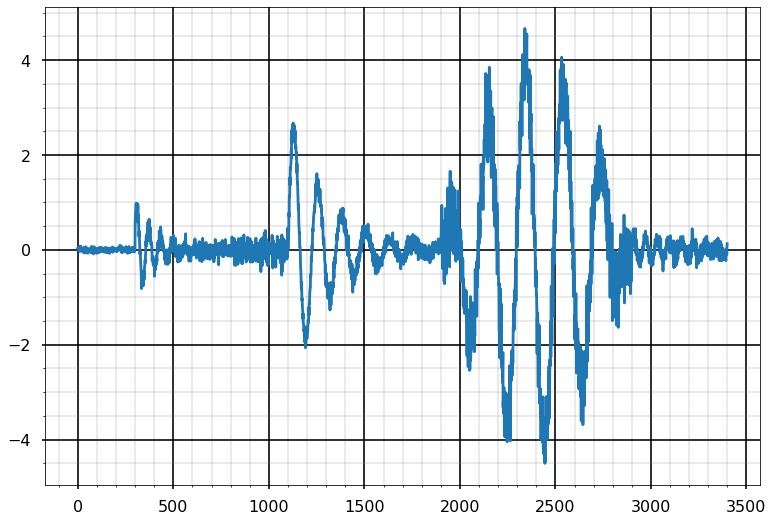

In [22]:
input_sig = []
std_sig = []

f_std = open("corr.txt", "r")
for x in f_std:
    std_sig.append(float(x))
f_std.close()

f_input = open("input4.txt", "r")
for x in f_input:
    input_sig.append(float(x))
f_input.close()

coeff = np.corrcoef(input_sig, std_sig)[0][1]
print("Correlation: ",coeff)
if(coeff<0.8):
    print("Match Unsuccessful")
    status=0
else:
    print("Match Successful")
    status=1

print("\nInput Wave Plot")
plt.plot(input_sig)
plt.style.use('seaborn-poster')
plt.grid(which='major',linestyle='-',color='black')
plt.minorticks_on()
plt.grid(which='minor',linestyle='-',color='gray',alpha=0.2)

## Visualizations
### Asymmetrical Data

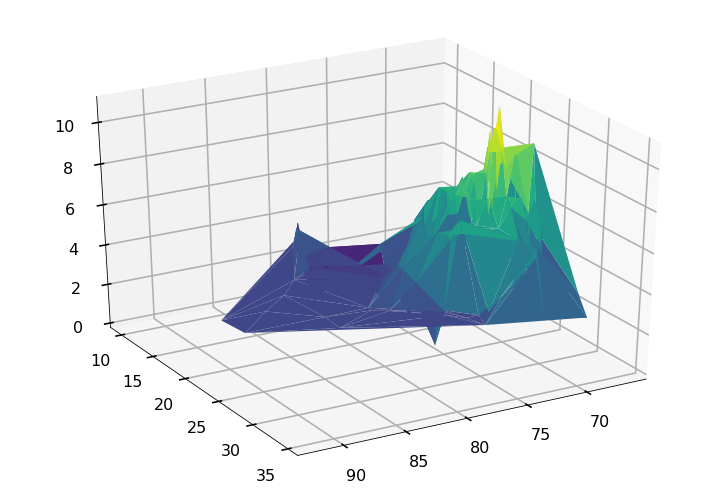

In [10]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(df["longitude"], df["latitude"], df["MMI"], cmap='viridis', edgecolor='none');
ax.view_init(30, 60)

### Simulated Symmetrical Data

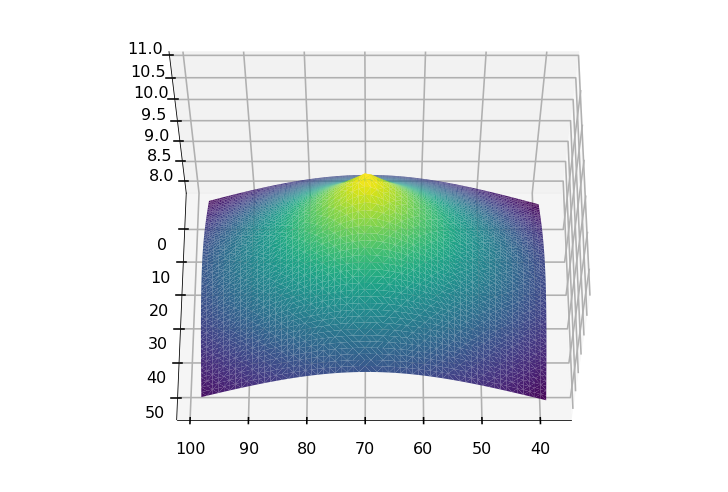

In [11]:
reconstructed_x = []
reconstructed_y = []
reconstructed_m = []
for i in range(int(longitude_epi)-30,int(longitude_epi)+30):
    for j in range(int(latitude_epi)-30,int(latitude_epi)+30):
        rad = math.sqrt((longitude_epi-i)**2 + (latitude_epi-j)**2)
        reconstructed_x.append(i)
        reconstructed_y.append(j)
        reconstructed_m.append(param[0]/(rad + param[1]))
        
ax = plt.axes(projection='3d')
ax.plot_trisurf(reconstructed_x, reconstructed_y,reconstructed_m, cmap='viridis', edgecolor='none');
ax.view_init(60, 90)

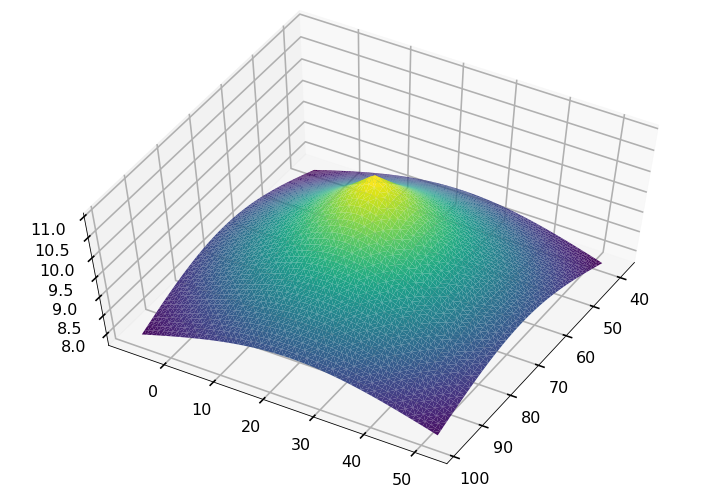

In [12]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(reconstructed_x, reconstructed_y,reconstructed_m, cmap='viridis', edgecolor='none');
ax.view_init(60, 30)

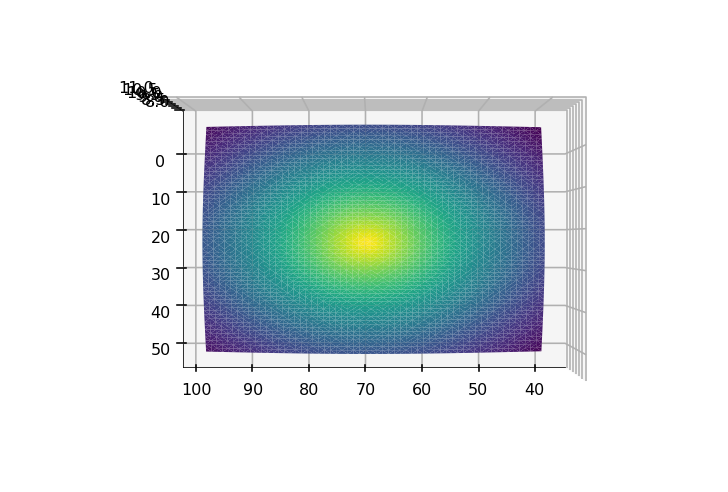

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(reconstructed_x, reconstructed_y,reconstructed_m, cmap='viridis', edgecolor='none');
ax.view_init(90, 90)

#### The Earthquake Wave Travels at around 9,000 to 10,800 kilometers per hour and Tsunami waves travel around 800 kilometers per hour

## Victim Imapct Prediction

In [14]:
victim_x = 200
victim_y = 100
victim_rad = math.sqrt((x_max-victim_x)**2 + (y_max-victim_y)**2)
victim_m = round(param[0]/(victim_rad + param[1]),2)
earthquake_speed = 9000/3600
tsunami_speed = 800/3600
e_time = round(victim_rad/earthquake_speed,2)
t_time = round(victim_rad/tsunami_speed,2)
print("Predicted MMI Magnitude: ",victim_m)
print("Estimated Time Left: ",e_time,"s")
print("Estimated Time Left for Tsunami: ",t_time,"s")

Predicted MMI Magnitude:  4.43
Estimated Time Left:  60.5 s
Estimated Time Left for Tsunami:  680.67 s


## Sending Alert to Possible Victims

In [23]:
import requests
 
url = "https://www.fast2sms.com/dev/bulk"

msg = "Earhquake Alert! MMI Magnitude: %.2f. Time Left: %.2f sec. Tsunami Expected in %.2f sec" %(victim_m,e_time,t_time)

if status==1:
    num = "9620272047"
else:
    print("Not an Earthquake!")

p1 = "sender_id=FSTSMS&"
p2 = "message=%s&" % msg
p3 = "language=english&route=p&"
p4 = "numbers=%s" % num

payload = ""+p1+p2+p3+p4

headers = {
 'authorization': "4rqzUJRDEGpOHSZh0oAwL8WVTjK1C5gmnXetbiYdkx3fPNBI9aeGRmapLqW1hZzXrHgtjJ8E9Sb7dT2B",
 'Content-Type': "application/x-www-form-urlencoded",
 'Cache-Control': "no-cache",
 }
 
try:
    response = requests.request("POST", url, data=payload, headers=headers)
    print(response.text)
except:
    print("Alert Sending Failed!")

{"return":true,"request_id":"82e3b19ju0hs6gp","message":["Message sent successfully to NonDND numbers"]}


### Victim Visualization

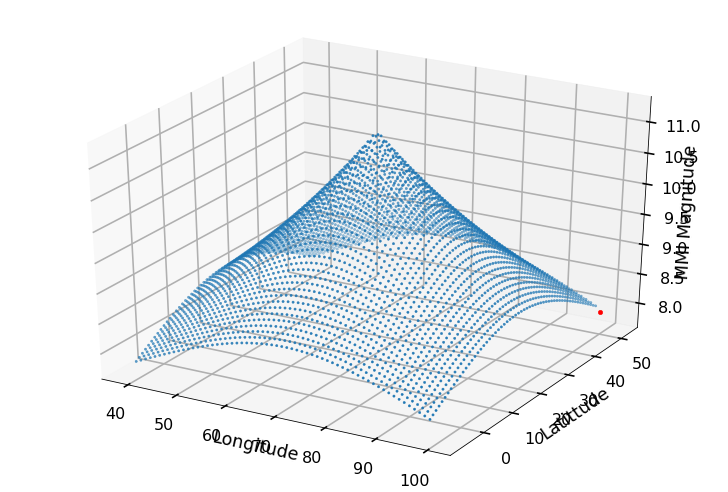

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.scatter(reconstructed_x, reconstructed_y,reconstructed_m, marker='.')
ax1.scatter(victim_x, victim_y,victim_m,c='r', marker='o')

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latittude')
ax1.set_zlabel('MMI Magnitude')

plt.show()